# Multiple Layer Perceptron Hands-on using `IRIS` dataset

#### Import certain libraries

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [3]:
os.getcwd() # to be aware of my current working directory

'/content'

#### Load `IRIS` data directly from `sklearn`

In [4]:
from sklearn.datasets import load_iris

In [5]:
#### Load the IRIS dataset
iris = load_iris()

In [6]:
type(iris)

sklearn.utils._bunch.Bunch

In [7]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [8]:
### Show the feature names
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [9]:
iris_df = pd.DataFrame(data = iris['data'],columns=iris['feature_names'])

In [10]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


### Let us add the `target` to `iris_df`

In [11]:
iris_df['target'] = iris['target']

In [12]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


### Quick `Exploratory Data Analysis` on `IRIS`

In [13]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [14]:
iris_df['target'].unique()

array([0, 1, 2])

### Visualize using distribution plots

### Let's assign IRIS species' names

In [15]:
iris_df['IRIS Species'] = iris_df['target'].apply(lambda x: 'setosa' if x==0 else ('versicolor'  if x==1 else 'virginica'))

In [16]:
iris_df.sample(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,IRIS Species
102,7.1,3.0,5.9,2.1,2,virginica
135,7.7,3.0,6.1,2.3,2,virginica
34,4.9,3.1,1.5,0.2,0,setosa
142,5.8,2.7,5.1,1.9,2,virginica
79,5.7,2.6,3.5,1.0,1,versicolor


In [17]:
### Function to plot the violin plots

def plot_vio(Y, i):
    plt.subplot(2,2,i)

    sns.violinplot(x='IRIS Species', y=Y, data=iris_df, hue='IRIS Species', dodge = False)

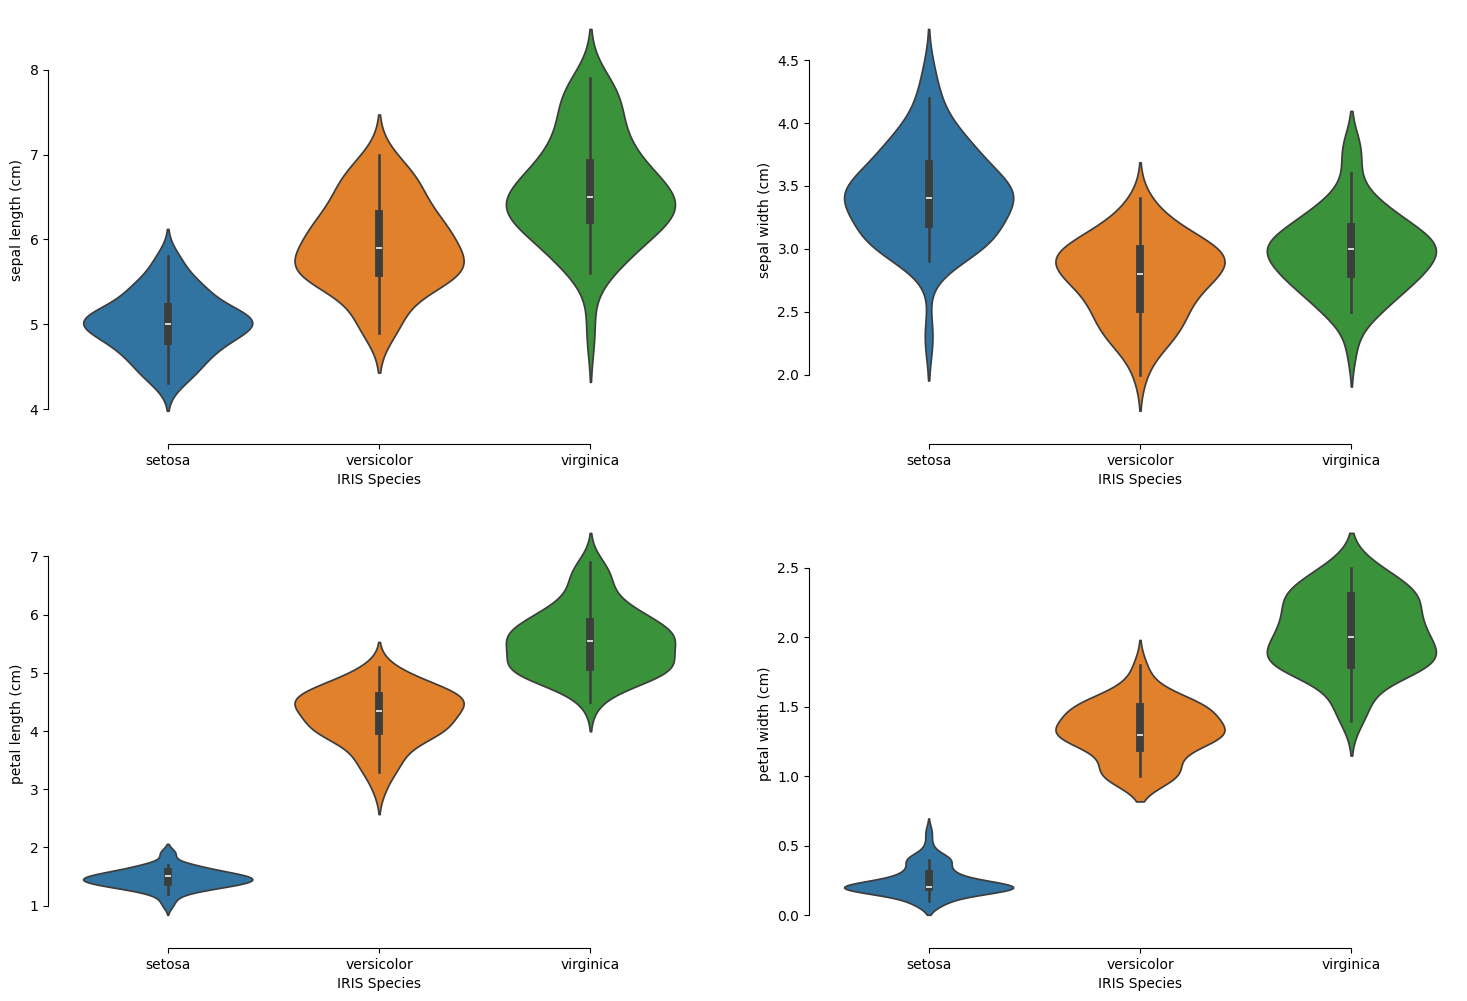

In [18]:
plt.figure(figsize = (18,12))

i=1
for m in iris_df.columns[:-2]:
    plot_vio(m, i)
    sns.despine(offset =10, trim=True)
    i +=1

In [19]:
iris_df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target', 'IRIS Species'],
      dtype='object')

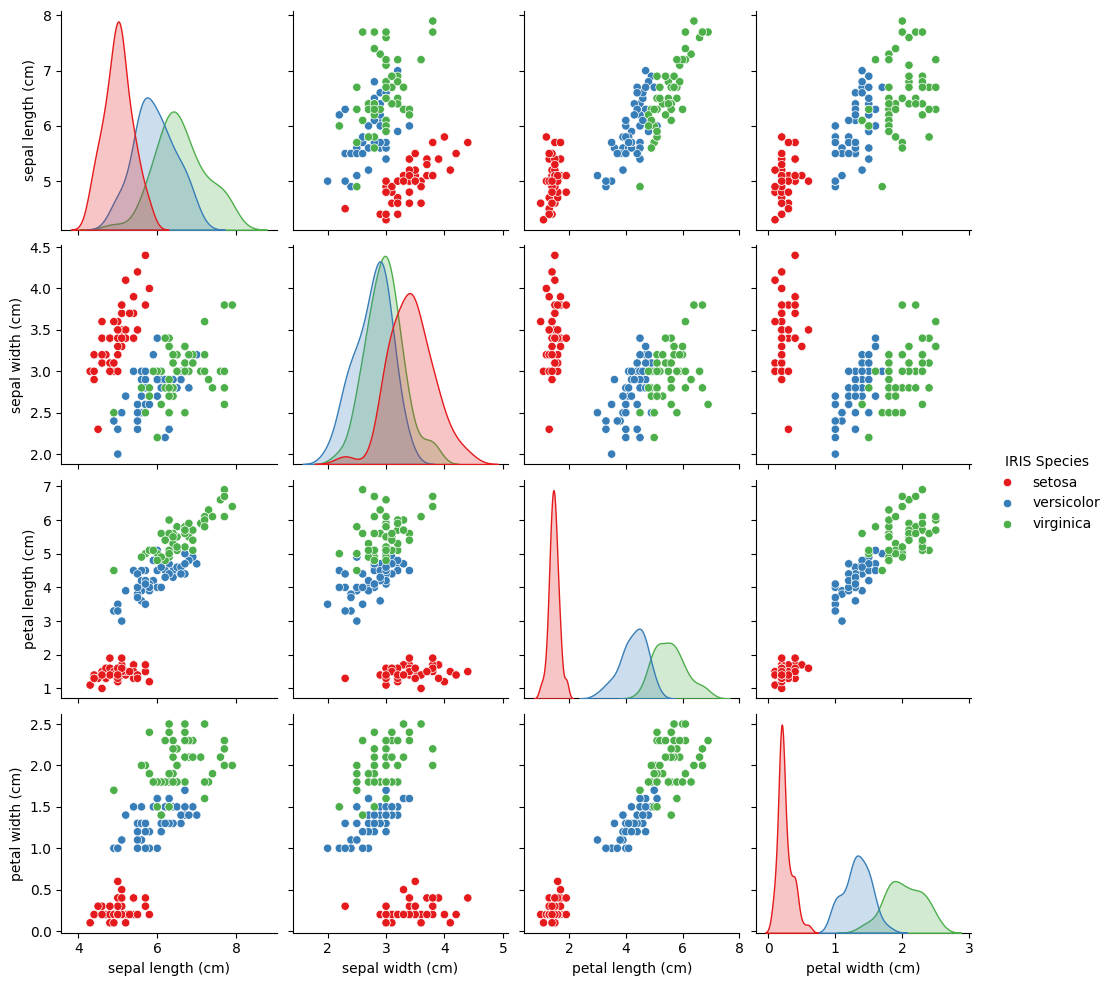

In [20]:
sns.pairplot(iris_df, hue='IRIS Species', vars = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'], palette='Set1');

### `INPUT LAYER` ---> ` (1) HIDDEN LAYER` ---> `OUTPUT LAYER`

In [21]:
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size, learning_rate = 0.01, epochs=100):
        self.input_size = input_size # no. of input vars or features in the input layer
        self.hidden_size = hidden_size #no. of neurons in the hidden layer (in here we have only one hidden layer)
        self.output_size = output_size #no. of neurons in the output layer
        self.learning_rate = learning_rate #learning rate for the gradient descent step
        self.epochs = epochs #no. of training epochs

        ### INITIALIZE WEIGHTS AND BIASES

        ###############################
        # INPUT LAYER TO HIDDEN LAYER
        ###############################
        self.W1 = np.random.randn(self.input_size, self.hidden_size)*0.01 #random weights drawn from std. normal distribution
        self.b1 = np.zeros((1, self.hidden_size)) # zero bias values for the neurons in the hidden layer

        ###############################
        # HIDDEN LAYER TO OUTPUT LAYER
        ###############################
        self.W2 = np.random.randn(self.hidden_size, self.output_size)*0.01 #random weights drawn from std. normal distribution
        self.b2 = np.zeros((1, self.output_size)) # zero bias values for the neurons in the output layer

        ### LOSS & ACCURACY HISTORY for PLOTTING
        self.loss_history = [] #empty list initialized to store the losses during training epochs
        self.accuracy_history = [] #empty list initialized to store the accuracy values during training epochs


    ### ADD SOME ACTIVATION FUNCTIONS

    ###  ReLU activation function
    def relu(self, z):
        return np.maximum(0,z)

    ### Derivative of ReLU for backpropagation
    def relu_derivative(self, z):
        return np.where(z>0, 1, 0) #np.where(condition, value_if_true, value_if_false)

    ### Softmax activation function
    def softmax(self, z):
        exp_values = np.exp(z - np.max(z, axis=1, keepdims=True)) #subtract max for numerical stability
        return exp_values/np.sum(exp_values, axis=1, keepdims= True)


    ###############################
    # 1.FORWARD PROPAGATION
    ###############################
    def forward(self, X):

        ###############################
        # INPUT LAYER TO HIDDEN LAYER
        ###############################
        self.z1 = np.dot(X, self.W1) + self.b1 # compute z = W1X + b1 &
        self.a1 = self.relu(self.z1) #plug z1 it into ReLU activation funtion to get output as a1

        ###############################
        # HIDDEN LAYER TO OUTPUT LAYER
        ###############################
        self.z2 = np.dot(self.a1, self.W2) + self.b2 # compute z = W2a1 + b2 &
        self.probs = self.softmax(self.z2) #plug z2 it into SoftMax activation funtion to get output as a2
        return self.probs

    ###############################
    # 2.COMPUTE LOSS & ACCURACY
    ###############################
    ### Cross-entropy loss for multi-class classfication
    def compute_loss(self, y_true, probs):
        loss = -np.mean(np.sum(y_true * np.log(probs), axis=1))
        return loss
    ### Compute accuracy
    def compute_accuracy(self, y_true, probs):
        predictions = np.argmax(probs, axis=1)
        true_labels = np.argmax(y_true, axis=1)
        return np.mean(predictions == true_labels)

    ###############################
    # 3.BACKPROPAGATION
    ###############################
    def backward(self, X, y):

        ## Using Batch Gradient Descent (BGD)
        ### Number of rows/training examples
        m = X.shape[0] #all rows in the data

        ### Gradients of the loss w.r.t. weights and biases of the output layer
        delta3 = self.probs - y #error at the output layer
        dW2 = np.dot(self.a1.T, delta3)/m #gradient of the loss w.r.t. weights of the output layer --> dW2
        db2 = np.sum(delta3, axis=0, keepdims=True)/m #gradient of the loss w.r.t bias of the output layer --> db2

        ### Gradients of the loss w.r.t weights and biases of the hidden layer
        delta2 = np.dot(delta3, self.W2.T) * self.relu_derivative(self.z1) #using derivative of ReLU
        dW1 = np.dot(X.T, delta2)/m #gradient of the loss w.r.t weights of the hidden layer --> dW1
        db1 = np.sum(delta2, axis=0, keepdims=True)/m #gradient of the loss w.r.t bias of the hidden layer --> db1

        ### Updating the parameters --> Weights and biases across the layers (Hidden Layer & Output Layer)
        self.W2 -= self.learning_rate * dW2
        self.b2 -= self.learning_rate * db2
        self.W1 -= self.learning_rate * dW1
        self.b1 -= self.learning_rate * db1


    ###############################
    # MLP TRAIN
    ###############################
    def train(self, X,y):
        for epoch in range(self.epochs):

            ### 1. Forward pass
            probs = self.forward(X) #computes the prediction using forward pass method

            ### 2. Compute the loss and accuracy
            loss = self.compute_loss(y, probs)
            accuracy = self.compute_accuracy(y, probs)
            self.loss_history.append(loss)
            self.accuracy_history.append(accuracy)

            #### 3. Backward Pass
            self.backward(X,y)

            ### Print the progress after every`10` epochs
            if epoch % 10 == 0:
                print(f'Training Metrics: Epoch: {epoch}, Loss: {loss:.4f}, Accuracy: {accuracy:.4f}')


### Initialize the `MLP` neural network model for `IRIS` dataset

In [22]:
input_size = 4 #number of features (directly from IRIS dataset)
hidden_size = 8 #number of neurons in the hidden layer
output_size = 3 #number of neurons in the output layer

### `FIRE` the very much our own `NN` --> `MLP` model

In [23]:
nn_iris = NeuralNetwork(input_size, hidden_size, output_size, learning_rate=0.03, epochs=500)

In [24]:
nn_iris

### `One-Hot Encoding`

In [25]:
X = iris.data
y = iris.target

In [26]:
encoder = OneHotEncoder(sparse_output=False)
y = encoder.fit_transform(y.reshape(-1,1))

In [27]:
y

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

In [28]:
iris_df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,IRIS Species
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica
149,5.9,3.0,5.1,1.8,2,virginica


In [29]:
### Split the `IRIS` dataset into `training` and `testing` sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
X_train.shape

(120, 4)

In [31]:
120/150*100

80.0

### Train using already configured `MLP NN` model on the X_train dataset

In [32]:
nn_iris.train(X_train, y_train)

Training Metrics: Epoch: 0, Loss: 1.0987, Accuracy: 0.2750
Training Metrics: Epoch: 10, Loss: 1.0983, Accuracy: 0.3417
Training Metrics: Epoch: 20, Loss: 1.0980, Accuracy: 0.3417
Training Metrics: Epoch: 30, Loss: 1.0975, Accuracy: 0.3417
Training Metrics: Epoch: 40, Loss: 1.0965, Accuracy: 0.3417
Training Metrics: Epoch: 50, Loss: 1.0949, Accuracy: 0.3417
Training Metrics: Epoch: 60, Loss: 1.0919, Accuracy: 0.3417
Training Metrics: Epoch: 70, Loss: 1.0866, Accuracy: 0.3417
Training Metrics: Epoch: 80, Loss: 1.0779, Accuracy: 0.5333
Training Metrics: Epoch: 90, Loss: 1.0642, Accuracy: 0.3250
Training Metrics: Epoch: 100, Loss: 1.0444, Accuracy: 0.3250
Training Metrics: Epoch: 110, Loss: 1.0175, Accuracy: 0.3417
Training Metrics: Epoch: 120, Loss: 0.9815, Accuracy: 0.6000
Training Metrics: Epoch: 130, Loss: 0.9353, Accuracy: 0.6583
Training Metrics: Epoch: 140, Loss: 0.8851, Accuracy: 0.6583
Training Metrics: Epoch: 150, Loss: 0.8329, Accuracy: 0.6583
Training Metrics: Epoch: 160, Loss:

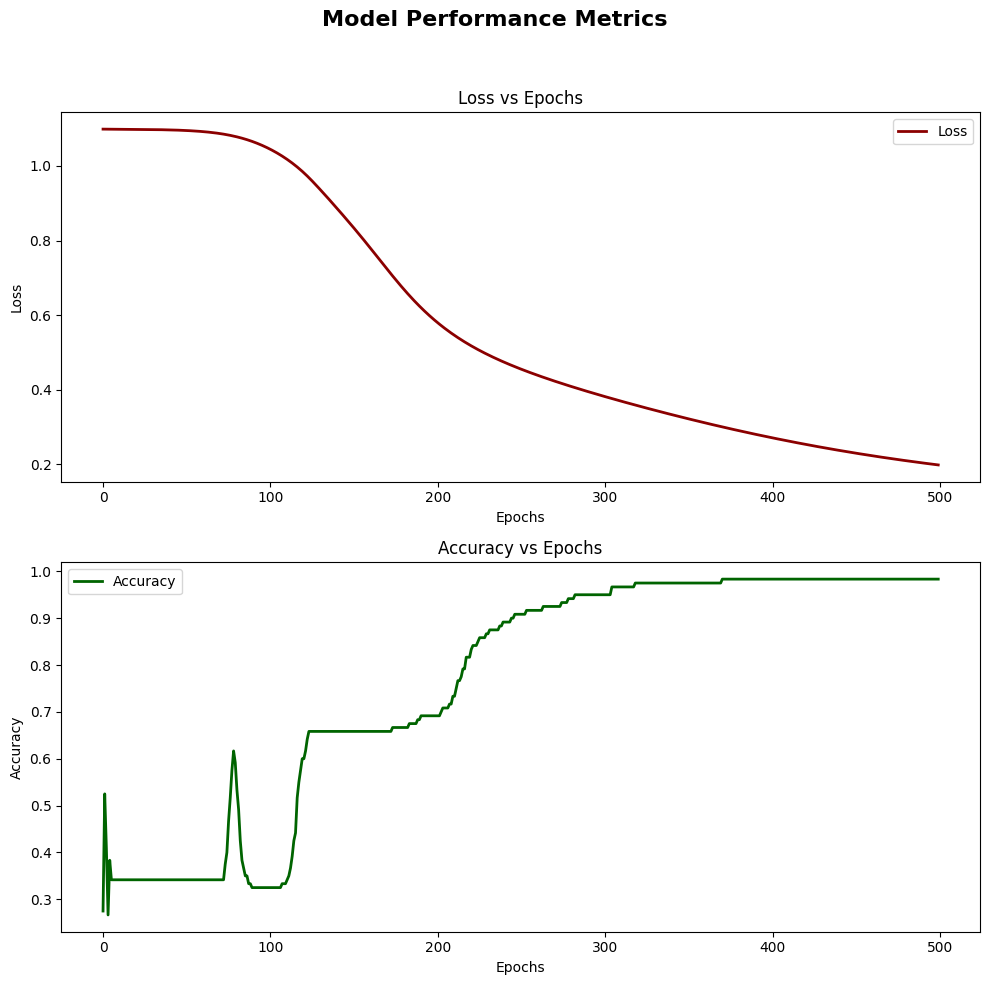

In [33]:
fig, ax = plt.subplots(2,1, figsize = (10,10))

### Plot the loss by epoch
ax[0].plot(nn_iris.loss_history, label='Loss', color='darkred', linewidth=2)
ax[0].set_title('Loss vs Epochs')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
ax[0].legend()


### Plot the accuracy by epoch
ax[1].plot(nn_iris.accuracy_history, label='Accuracy', color='darkgreen', linewidth=2)
ax[1].set_title('Accuracy vs Epochs')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')
ax[1].legend()

### Add a super title
plt.suptitle('Model Performance Metrics', fontsize=16, fontweight='bold')

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to fit the super title

plt.show()